<a href="https://colab.research.google.com/github/ANIZAI/Object-Detection-using-VGG16/blob/master/object_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from __future__ import absolute_import, division, print_function
from tqdm import tqdm
from numpy.random import randn
 
import pathlib
import random
import matplotlib.pyplot as plt
 
import tensorflow as tf
import numpy as np
 
from matplotlib.image import imread
from keras.preprocessing import image
 

 
AUTOTUNE = tf.data.experimental.AUTOTUNE
 
data_dir = tf.keras.utils.get_file('flower_photos','https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz', untar=True)
data_dir = pathlib.Path(data_dir)
 
label_names={'daisy': 0, 'dandelion': 1, 'roses': 2, 'sunflowers': 3, 'tulips': 4}
label_key=['daisy','dandelion','roses','sunflowers','tulips']

In [0]:
all_images = list(data_dir.glob('*/*'))
all_images = [str(path) for path in all_images]
random.shuffle(all_images)
 
all_labels=[label_names[pathlib.Path(path).parent.name] for path in all_images]
 
data_size=len(all_images)
 
train_test_split=(int)(data_size*0.2)
 
x_train=all_images[train_test_split:]
x_test=all_images[:train_test_split]
 
y_train=all_labels[train_test_split:]
y_test=all_labels[:train_test_split]
 
IMG_SIZE=160
 
BATCH_SIZE = 32
 
def _parse_data(x,y):
  image = tf.io.read_file(x)
  image = tf.image.decode_jpeg(image, channels=3)
  image = tf.cast(image, tf.float32)
  image = (image/127.5) - 1
  image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
 
  return image,y
 
def _input_fn(x,y):
  ds=tf.data.Dataset.from_tensor_slices((x,y))
  ds=ds.map(_parse_data)
  ds=ds.shuffle(buffer_size=data_size)
  
  
  ds = ds.repeat()
  
  ds = ds.batch(BATCH_SIZE)
  
  ds = ds.prefetch(buffer_size=AUTOTUNE)
  
  return ds
  
train_ds=_input_fn(x_train,y_train)
validation_ds=_input_fn(x_test,y_test)

In [0]:
IMG_SHAPE = (IMG_SIZE, IMG_SIZE, 3)
VGG16_MODEL=tf.keras.applications.VGG16(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

In [0]:
VGG16_MODEL.trainable=False
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
prediction_layer = tf.keras.layers.Dense(len(label_names),activation='softmax')

In [0]:
model = tf.keras.Sequential([
  VGG16_MODEL,
  global_average_layer,
  prediction_layer
])

In [0]:
model.compile(optimizer = tf.keras.optimizers.Adam(),
           loss = 'sparse_categorical_crossentropy',
           metrics=['accuracy'])

In [26]:
history = model.fit(train_ds,
                    epochs=100, 
                    steps_per_epoch=2,
                    validation_steps=2,
                    validation_data=validation_ds)

Epoch 1/100
2/2 [==============================] - 28s 14s/step - loss: 1.6908 - accuracy: 0.2031 - val_loss: 1.7350 - val_accuracy: 0.1562
Epoch 2/100
2/2 [==============================] - 26s 13s/step - loss: 1.7018 - accuracy: 0.2500 - val_loss: 1.7487 - val_accuracy: 0.1719
Epoch 3/100
2/2 [==============================] - 26s 13s/step - loss: 1.6113 - accuracy: 0.2656 - val_loss: 1.6455 - val_accuracy: 0.2969
Epoch 4/100
2/2 [==============================] - 26s 13s/step - loss: 1.6550 - accuracy: 0.1719 - val_loss: 1.6648 - val_accuracy: 0.2656
Epoch 5/100
2/2 [==============================] - 26s 13s/step - loss: 1.6211 - accuracy: 0.2812 - val_loss: 1.5937 - val_accuracy: 0.3594
Epoch 6/100
2/2 [==============================] - 26s 13s/step - loss: 1.5693 - accuracy: 0.2969 - val_loss: 1.5864 - val_accuracy: 0.2969
Epoch 7/100
2/2 [==============================] - 26s 13s/step - loss: 1.5401 - accuracy: 0.3281 - val_loss: 1.5827 - val_accuracy: 0.1875
Epoch 8/100
2/2 [===

In [27]:
validation_steps = 20
 
loss0,accuracy0 = model.evaluate(validation_ds, steps = validation_steps)
 
print("loss: {:.2f}".format(loss0))
print("accuracy: {:.2f}".format(accuracy0))

20/20 [==============================] - 153s 8s/step - loss: 0.9493 - accuracy: 0.7063
loss: 0.95
accuracy: 0.71


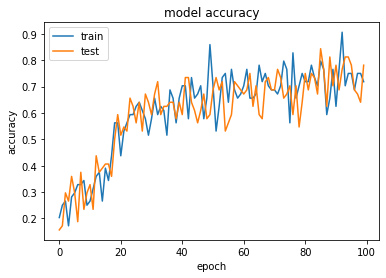

In [40]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

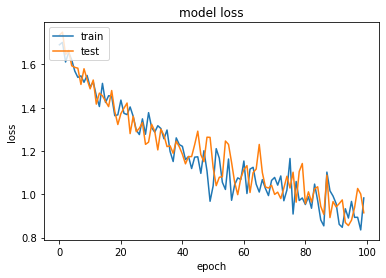

In [41]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()